<a href="https://colab.research.google.com/github/EmilHJ98/ai-ml-principles-exercises/blob/main/Prediction_on_own_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn

In [2]:
import sklearn.datasets as datasets

In [3]:
data = datasets.load_digits()

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
len(data.images)

1797

In [6]:
data.images[0].shape

(8, 8)

In [7]:
data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [8]:
data.target[0]

0

4


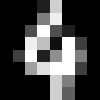

In [9]:
from PIL import Image
import numpy as np

i = 100
print(data.target[i])
Image.fromarray((data.images[i] / 16 * 255). astype(np.uint8), "L").resize((100, 100), resample=Image.NEAREST)

In [10]:
data.images.reshape((len(data.images), -1)).shape

(1797, 64)

#Train a model





In [11]:
from sklearn.model_selection import train_test_split

In [12]:
flat_dataset = data.images.reshape((len(data.images), -1))
X_train, X_test, y_train, y_test = train_test_split(flat_dataset, data.target, train_size=0.8)

In [13]:
X_train.shape

(1437, 64)

5


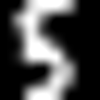

In [14]:
print(y_test[100])
Image.fromarray((X_test[100].reshape((8,8))/ 16 * 255).astype(np.uint8), "L").resize((100,100))


In [15]:
from sklearn import svm


In [16]:
model = svm.SVC(gamma=0.001)
model.fit(X_train, y_train)

SVC(gamma=0.001)

In [17]:
model.predict(X_train[0:10])

array([9, 3, 9, 4, 2, 4, 2, 1, 9, 0])

In [18]:
y_test[0:10]

array([6, 9, 8, 8, 9, 9, 5, 1, 5, 9])

In [19]:
from sklearn import metrics
predicted = model.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        30
           3       0.97      1.00      0.99        33
           4       1.00      1.00      1.00        41
           5       1.00      0.97      0.99        37
           6       1.00      0.98      0.99        44
           7       0.97      1.00      0.98        32
           8       0.93      1.00      0.97        28
           9       0.98      0.93      0.95        45

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



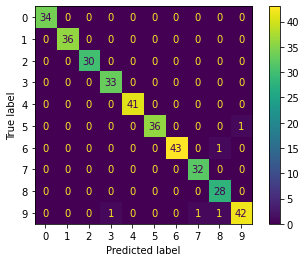

In [20]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)

In [21]:
model

SVC(gamma=0.001)

#save the model to disk


In [22]:
import pickle 

In [23]:
with open("model.pkl", "wb") as fio:
  pickle.dump(model, fio)


In [24]:
with open("model.pkl", "rb") as fio:
  mymodel = pickle.load(fio)

In [25]:
model.predict(X_test[:10])

array([6, 9, 8, 8, 9, 9, 5, 1, 5, 9])

In [26]:
y_test[:10]

array([6, 9, 8, 8, 9, 9, 5, 1, 5, 9])

#Predictions on images that we have uploaded ourself

In [36]:
im = Image.open("22.jpg").resize((8,8))

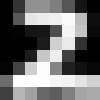

In [37]:
im.resize((100,100),resample=Image.NEAREST)

In [38]:
np_im = np.array(im)


In [39]:
np_im.shape

(8, 8)

In [40]:
# We need to transform this image to the same format as the images in the test and train datasets
preprocessed_img = np_im.astype(np.float32) / 255 * 16

In [41]:
# We also need to flatten it as we did with the training data and expand the "batch" dimension so that we get a list of one image
preprocessed_img.flatten()[None].shape

(1, 64)

In [42]:
model.predict(preprocessed_img.flatten()[None])

array([2])

#Compare our own image to digits from the dataset

In [45]:
np.where(y_test == 2)

(array([ 23,  24,  33,  44,  71,  93, 101, 113, 136, 143, 147, 154, 164,
        172, 182, 193, 213, 231, 238, 242, 270, 279, 280, 285, 286, 304,
        308, 311, 318, 328]),)

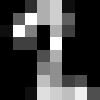

In [46]:
Image.fromarray((X_test[23].reshape((8,8)) / 16 * 255).astype(np.uint8), "L").resize((100,100), resample=Image.NEAREST)